# 한국어 형태소 분석기 

- 한국어 형태소처리를 위해, 각 기관에서 형태소 분석(토큰화 + 태깅)을 해주는 라이브러리 개발 
- KKMA Class : 서울대학교 IDS연구실에서 개발한 한국어 형태소 분석기 
- Komoran Class : Shine Ware에서 개발한 한국어 형태소 분석기
- Okt : 트위터 형태소 분석기 
- Hannanum Class : KAIST SWRC연구실에서 개발 

In [1]:
import konlpy
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from konlpy.tag import Komoran

In [2]:
text3 = "맷돌 손잡이를 어이라 그래요 어이. 맷돌에 뭘 갈려고 집어놓고 맷돌을 돌리려고 하는데 손잡이가 빠졌네?"

In [3]:
kkma    = Kkma()
okt     = Okt()
komoran = Komoran()
hannanum= Hannanum()

In [4]:
print('okt 형태소 분석 : ', okt.morphs(text3))
print('kkma 형태소 분석 : ', kkma.morphs(text3))
print('hannanum 형태소 분석 : ', hannanum.morphs(text3))
print('komoran 형태소 분석 : ', komoran.morphs(text3))

okt 형태소 분석 :  ['맷돌', '손잡이', '를', '어이', '라', '그래요', '어이', '.', '맷돌', '에', '뭘', '갈려고', '집어놓고', '맷돌', '을', '돌리려고', '하는데', '손잡이', '가', '빠졌네', '?']
kkma 형태소 분석 :  ['맷돌', '손잡이', '를', '어이', '라', '그리하', '여요', '어이', '.', '맷돌', '에', '무엇', '을', '갈', '려고', '집', '어', '놓', '고', '맷돌', '을', '돌리', '려고', '하', '는데', '손잡이', '가', '빠지', '었', '네', '?']
hannanum 형태소 분석 :  ['맷돌', '손잡이', '를', '어이', '이', '라', '그렇', '어', '요', '어이', '.', '맷돌', '에', '뭐', '을', '갈', '려고', '집', '어', '놓', '고', '맷돌', '을', '돌리', '려고', '하', 'ㄴ데', '손잡이', '가', '빠지', '었네', '?']
komoran 형태소 분석 :  ['맷돌', '손잡이', '를', '어이', '라', '그래요', '어이', '.', '맷돌', '에', '뭘', '갈', '려고', '집', '어', '놓', '고', '맷돌', '을', '돌리', '려고', '하', '는데', '손잡이', '가', '빠지', '었', '네', '?']


In [5]:
print('okt 형태소 분석 : ', okt.pos(text3))
print('kkma 형태소 분석 : ', kkma.pos(text3))
print('hannanum 형태소 분석 : ', hannanum.pos(text3))
print('komoran 형태소 분석 : ', komoran.pos(text3))

okt 형태소 분석 :  [('맷돌', 'Noun'), ('손잡이', 'Noun'), ('를', 'Josa'), ('어이', 'Noun'), ('라', 'Josa'), ('그래요', 'Adjective'), ('어이', 'Noun'), ('.', 'Punctuation'), ('맷돌', 'Noun'), ('에', 'Josa'), ('뭘', 'Noun'), ('갈려고', 'Verb'), ('집어놓고', 'Verb'), ('맷돌', 'Noun'), ('을', 'Josa'), ('돌리려고', 'Verb'), ('하는데', 'Verb'), ('손잡이', 'Noun'), ('가', 'Josa'), ('빠졌네', 'Verb'), ('?', 'Punctuation')]
kkma 형태소 분석 :  [('맷돌', 'NNG'), ('손잡이', 'NNG'), ('를', 'JKO'), ('어이', 'VV'), ('라', 'ECD'), ('그리하', 'VV'), ('여요', 'ECD'), ('어이', 'NNG'), ('.', 'SF'), ('맷돌', 'NNG'), ('에', 'JKM'), ('무엇', 'NNG'), ('을', 'JKO'), ('갈', 'VV'), ('려고', 'ECD'), ('집', 'VV'), ('어', 'ECD'), ('놓', 'VXV'), ('고', 'ECE'), ('맷돌', 'NNG'), ('을', 'JKO'), ('돌리', 'VV'), ('려고', 'ECD'), ('하', 'VV'), ('는데', 'ECD'), ('손잡이', 'NNG'), ('가', 'JKS'), ('빠지', 'VV'), ('었', 'EPT'), ('네', 'EFN'), ('?', 'SF')]
hannanum 형태소 분석 :  [('맷돌', 'N'), ('손잡이', 'N'), ('를', 'J'), ('어이', 'N'), ('이', 'J'), ('라', 'E'), ('그렇', 'P'), ('어', 'E'), ('요', 'J'), ('어이', 'N'), ('.', 'S'), ('맷돌', 'N')

# 형태소 분석 기반 워드 클라우드 

In [6]:
# 데이터 처리 
import pandas as pd 
import numpy as np
# 시각화 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
# 시각화 옵션 
from IPython.display import set_matplotlib_formats

mpl.rc('font',family='Malgun Gothic') # 시각화 한글 글꼴 설정
mpl.rc('axes',unicode_minus = True)   # 음수값 글꼴 설정 

set_matplotlib_formats('retina') # 글씨체 선명하게 

In [7]:
df1 = pd.read_csv('배달의_민족_기업평가.csv')
print(df1.shape)
df1.head()

(152, 11)


,Unnamed: 0,직종,재직여부,지역,작성시간,한줄평,기업장점,기업단점,바라는점,기업성장여부,기업추천여부
0,0,경영/기획/컨설팅,현직원,서울,2019. 01. 03,"""무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안...","1. 내부구성원들을 위하는 기업문화가 형성되어있고, 실제로 운영측면에서도 배려마인드...",빠르게 성장하는회사의 특징! 바뀌는 업무가 많습니다. 하루하루 다이나믹해요.,향후 회사가 어떤 방향으로 성장해야 할지 지속적으로 고민하시고 공유해주셔서 감사합니...,성장,추천
1,1,경영/기획/컨설팅,현직원,서울,2019. 03. 08,"""체계적인 업무분담으로 자율성을 강조하며 사내분위기로 실무를 극대화할 수 있는 좋은...","그 누구의 눈치도 보지 않으며, 자유로운 의사소통에 내부 분위기, 팀별로 케바케 이...","팀별로 케바케, 외근 및 인테리어관련 부서는 낮과 밤이 없어보이지만 그들에게도 얼굴...","너무 좋아서 변하지 않을까 걱정이 됩니다\n지금처럼 고객, 파트너사, 직원들을 생각...",성장,추천
2,2,인사/총무,현직원,서울,2019. 01. 25,"""개발자가 대우받으며 일할 수 있는곳, 워라밸 좋음""","도서구입비 무제한 지원, 주 35시간 근무, 월요일은 오후1시 출근,",아직 커가는 회사라서 이것저것 세팅해 나가는 단계. 그러나 세팅해 나갈때에도 경쟁사...,없다. 비전이 뚜렷하고 가고자하는 방향이 있어 좋음.,성장,추천
3,3,전문직,전직원,서울,2019. 01. 15,"""일하기 좋은 회사. 누구라도 잘 알고 있는 회사인만큼 실제로도 매우 만족스러운 회...",자율적인 분위기와 좋은 복지를 많이 갖춘 곳. 좋은 사람들이 많이 모여있고 그 안에...,팀내 팀장과의 소통이 많이 있지 않았던터라 팀끼리 협업이 부족했다. 속해있던 팀 내...,조금 더 폭넓은 관심이 필요 할 것 같다. 이래도 되나? 싶을 정도에 사람이 많이 ...,성장,추천
4,4,경영/기획/컨설팅,현직원,서울,2019. 01. 03,"""무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안...","1. 내부구성원들을 위하는 기업문화가 형성되어있고, 실제로 운영측면에서도 배려마인드...",빠르게 성장하는회사의 특징! 바뀌는 업무가 많습니다. 하루하루 다이나믹해요.,향후 회사가 어떤 방향으로 성장해야 할지 지속적으로 고민하시고 공유해주셔서 감사합니...,성장,추천


- 1. 형태소 분석 (토큰나이징 + 태깅)

In [8]:
comm_list = df1['한줄평'].values.tolist()

In [9]:
comm_list[0]

'"무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안에서 나도 성장하고."'

In [10]:
okt.pos(comm_list[0])

[('"', 'Punctuation'),
 ('무섭도록', 'Adjective'),
 ('빠른', 'Adjective'),
 ('속도', 'Noun'),
 ('로', 'Josa'),
 ('성장', 'Noun'),
 ('중', 'Suffix'),
 ('인', 'Josa'),
 ('대한민국', 'Noun'),
 ('스타트업', 'Noun'),
 ('의', 'Josa'),
 ('상징', 'Noun'),
 ('!', 'Punctuation'),
 ('\n', 'Foreign'),
 ('회사', 'Noun'),
 ('도', 'Josa'),
 ('성장하고', 'Adjective'),
 ('그', 'Noun'),
 ('안', 'Noun'),
 ('에서', 'Josa'),
 ('나도', 'Verb'),
 ('성장하고', 'Adjective'),
 ('."', 'Punctuation')]

In [11]:
pos_data = pd.DataFrame(okt.pos(comm_list[0]) , columns=['형태소','품사'])
pos_data.head()

,형태소,품사
0,"""",Punctuation
1,무섭도록,Adjective
2,빠른,Adjective
3,속도,Noun
4,로,Josa


In [12]:
df_Pos = pd.DataFrame()

for i in range(0,len(df1['한줄평'])):
    pos_data = okt.pos(df1['한줄평'].values.tolist()[i])
    dfn = pd.DataFrame(pos_data)
    
    df_Pos = pd.concat([df_Pos, dfn])

In [13]:
pos_data = df_Pos.rename(columns={0:'형태소',1:'품사'})
pos_data.head()

,형태소,품사
0,"""",Punctuation
1,무섭도록,Adjective
2,빠른,Adjective
3,속도,Noun
4,로,Josa


In [14]:
pos_data.shape

(3149, 2)

- 2. 워드 클라우드를 그릴 품사 추출 (명사/형용사/동사)

In [15]:
pos_data['품사'].value_counts()

Noun              1280
Josa               542
Punctuation        429
Adjective          331
Verb               321
Suffix              94
Adverb              52
Modifier            31
Foreign             22
Determiner          13
Alpha               10
Conjunction          9
Number               7
VerbPrefix           5
KoreanParticle       3
Name: 품사, dtype: int64

In [16]:
cond1   = (pos_data['품사']=='Noun')
df_Noun = pos_data.loc[cond1]
df_Noun.head()

,형태소,품사
3,속도,Noun
5,성장,Noun
8,대한민국,Noun
9,스타트업,Noun
11,상징,Noun


- 3. 한줄명 명사 워드클라우드 시각화 

In [17]:
# !pip install --user wordcloud

In [18]:
from wordcloud import WordCloud

In [19]:
wc = WordCloud(width=800,height=600,
               font_path='Malgun.ttf').generate(' '.join(df_Noun['형태소']))

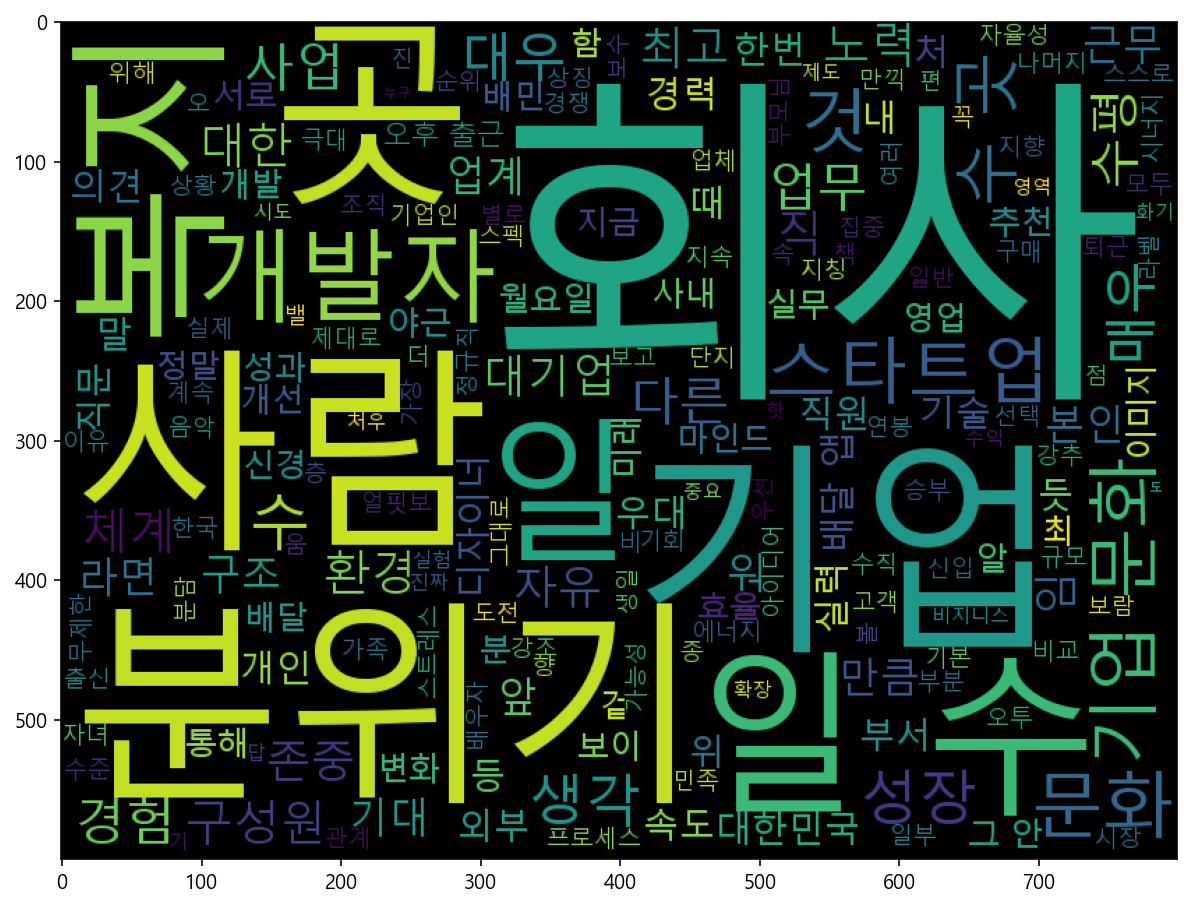

In [20]:
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.show()

 - 기업 단점에 대한 워드 클라우드 

In [27]:
df_Pos = pd.DataFrame()

for i in range(0,len(df1['기업단점'])):
    pos_data = okt.pos(df1['기업단점'].values.tolist()[i])
    dfn = pd.DataFrame(pos_data)
    
    df_Pos = pd.concat([df_Pos, dfn])

pos_data = df_Pos.rename(columns={0:'형태소',1:'품사'})
pos_data.head()

,형태소,품사
0,빠르게,Adjective
1,성장하는,Adjective
2,회사,Noun
3,의,Josa
4,특징,Noun


In [28]:
cond1   = (pos_data['품사']=='Noun')
df_Noun = pos_data.loc[cond1]
df_Noun.head()

,형태소,품사
2,회사,Noun
4,특징,Noun
7,업무,Noun
11,하루하루,Noun
12,다이나믹,Noun


In [31]:
from wordcloud import STOPWORDS

In [39]:
wc = WordCloud(stopwords=STOPWORDS ,width=800,height=600,
               font_path='Malgun.ttf').generate(' '.join(df_Noun['형태소']))

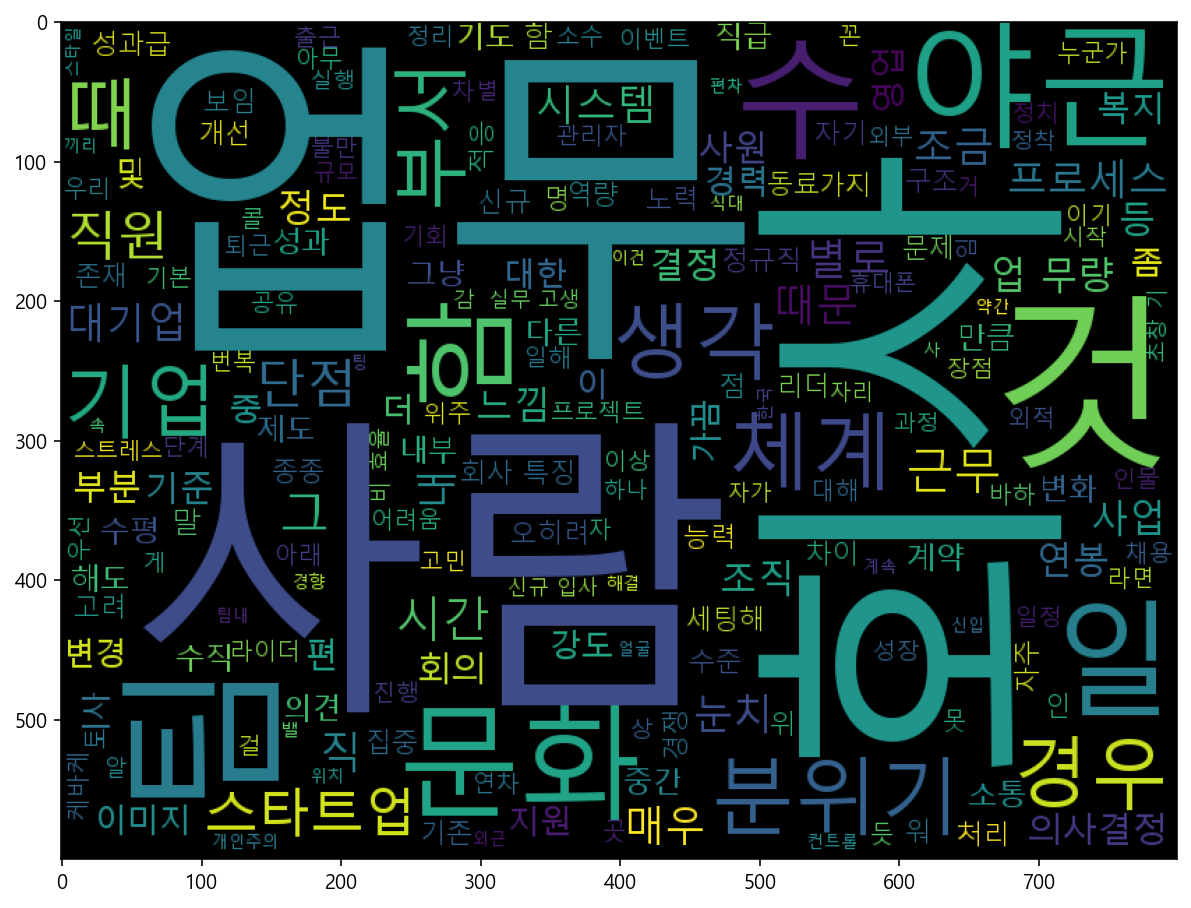

In [40]:
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.show()

# 단어 표현 (Word Representation)

- 언어적 특성을 활용해, 단어를 수치화 하여 (벡터화) 컴퓨터가 이해할 수 있는 형태로 변환 
- Word Embedding / Word to Vector (Word2Vec)
- 통계 기반의 자연어처리의 근간이 되는 부분 
- 텍스트 마이닝의 선행단계
- Word2Vec 크게 3가지 방법이 존재:
    - One Hot Encoding
    - Continuous Bag of Word (BOW)
    - Term Frequence - Inverse Document Frequency (TF-IDF)

# One Hot Encoding 

- 문장의 모든 단어를 0 또는 1로 변환 
- 1값이 어떤 단어인지 알려주는 index가 됨 / 각 단어의 index 표현해서 변환 
- 장점 : 
    - 방법 자체가 매우 간단하다
    - 컴퓨터나 사람이 이해하기가 쉽다
    
- 단점 : 
    - 대량의 Text를 분석하는 경우, 단어가 매우많아 벡터의 크기가 매우 커진다, 비효율적
    - 벡터 자체에 단어의 의미나 특성이 전혀 표현되지 않음 

In [41]:
text1   = "그대 기억이 지난 사랑이 내 안을 파고드는 가시가 되어. 제발 가라고 흐아주 가라고 애써도 나를 괴롭히는데"
df_buzz = pd.DataFrame(okt.pos(text1),columns=['형태소' ,'품사'])

In [43]:
df_buzz['형태소'].unique()

array(['그대', '기억', '이', '지난', '사랑', '내', '안', '을', '파고드는', '가시', '가',
       '되어', '.', '제발', '가라', '고', '흐', '아주', '애써도', '나를', '괴롭히는데'],
      dtype=object)

In [45]:
word_vector = pd.get_dummies(df_buzz['형태소'])
word_vector.head(2)

,.,가,가라,가시,고,괴롭히는데,그대,기억,나를,내,...,사랑,아주,안,애써도,을,이,제발,지난,파고드는,흐
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Continuous Bag of Words 

- 문서 내 모든 단어를 모아놓고  단어에 대한 빈도수를 바탕으로 Feature값을 추출하는 작업
- 장점 : 
    - 현재까지도 사용되는 가장 기본적인 벡터화 기법
    - 넓은 범위의 (비교적 긴 문장)에서 사용이 가능 / 쉽고 빠르게 구축됨
    - 문장의 특성을 잘 나타낼 수 있음 

- 단점 : 
    - 문맥 (Semantic) : 문장 내 단어의 문맥적 의미를 반영하기가 어려움 / BOW 단어의 순서를 고려하지 않기 때문 (N-Gram 방법을 활용하여 해결)
    - Sparse Matrix : 단어가 매우 많은 경우, 희소행렬(불필요한 단어 Column)형태로 벡터가 크게 구성될 수 있다. -> 분석속도와 예측성능을 하락 (TF-IDF 방법을 활용해 해결)

In [46]:
from konlpy.tag import Kkma
from sklearn.feature_extraction.text import CountVectorizer
# CountVectorizer : 각 문장에 특정 단어가 나타는 횟수를 Count하여 Vector로 표현 
# 소문자 변환 / 토크나이징 / 불용어 필터링 등의 텍스트 전처리도 가능 

In [47]:
text2 = "너와 함께 한 시간 모두 눈부셨다. 날이 좋아서, 날이 좋지 않아서, 날이 적당해서, 모든 날이 좋았다. 그리고 무슨일이 벌어져도 니 잘못이 아니다."

In [48]:
kkma = Kkma()

In [49]:
kkma.sentences(text2)

['너와 함께 한 시간 모두 눈부셨다.',
 '날이 좋아서, 날이 좋지 않아서, 날이 적당해서, 모든 날이 좋았다.',
 '그리고 무슨 일이 벌어져도 니 잘못이 아니다.']

In [50]:
sent1 = kkma.sentences(text2)

In [53]:
vec_model = CountVectorizer()
x = vec_model.fit_transform(sent1)

In [55]:
x.toarray()

array([[0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]],
      dtype=int64)

In [56]:
vec_model.get_feature_names()

['그리고',
 '날이',
 '너와',
 '눈부셨다',
 '모두',
 '모든',
 '무슨',
 '벌어져도',
 '시간',
 '아니다',
 '않아서',
 '일이',
 '잘못이',
 '적당해서',
 '좋아서',
 '좋았다',
 '좋지',
 '함께']

In [57]:
pd.DataFrame(data=x.toarray(), columns=vec_model.get_feature_names())

,그리고,날이,너와,눈부셨다,모두,모든,무슨,벌어져도,시간,아니다,않아서,일이,잘못이,적당해서,좋아서,좋았다,좋지,함께
0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,4,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0
2,1,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0


# Term Frequence Inverse Document Frequency (TF-IDF)

- CBOW 보완하기 위해, 개별 문서나 문장 내에서 자주 나타나는 단에 가중치 부여 
- 전체적으로 많이 등장하는 단에는 패널 부여 
- 가중치를 이용해, 범용적으로 사용하는 단어는 제거, 강조되는 단어를 찾아내어 텍스트 마이닝 적용시, 모델의 성능을 향상 

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
text2 = "너와 함께 한 시간 모두 눈부셨다. 날이 좋아서, 날이 좋지 않아서, 날이 적당해서, 모든 날이 좋았다. 그리고 무슨일이 벌어져도 니 잘못이 아니다."

In [60]:
kkm = Kkma()
sent1 = kkm.sentences(text2)

In [62]:
model_vec = TfidfVectorizer()
x = model_vec.fit_transform(sent1)

In [63]:
pd.DataFrame(data=x.toarray(), columns=vec_model.get_feature_names())

,그리고,날이,너와,눈부셨다,모두,모든,무슨,벌어져도,시간,아니다,않아서,일이,잘못이,적당해서,좋아서,좋았다,좋지,함께
0,0.000000,0.000000,0.447214,0.447214,0.447214,0.000000,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214
1,0.000000,0.852803,0.000000,0.000000,0.000000,0.213201,0.000000,0.000000,0.000000,0.000000,0.213201,0.000000,0.000000,0.213201,0.213201,0.213201,0.213201,0.000000
2,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.408248,0.000000,0.408248,0.000000,0.408248,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000


# 문장 표현 (Sentence Representation)

- 텍스트 분류 및 연관성 분석 등 텍스트 마이닝의 기법을 사용하기 위한 문장 단위의 표현방법
- 문장 표현 :
    - Text to Sequence 
    - Padding 

# Text to Sequence 

- 문자를 Sequence으로 변환 
- 문장 내 단어들을 하나의 정수와 매칭시켜, 한 문장을 여러개의 정수로 표현 
- 컴퓨터만의 단어 사전을 구축하여, 문장 내 각 단어들의 위치정보를 구축하는 작업 

In [65]:
# !pip install tensorflow 

In [64]:
import pandas as pd 
from tensorflow.keras.preprocessing.text import Tokenizer

In [67]:
df1['한줄평']

0      "무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안...
1      "체계적인 업무분담으로 자율성을 강조하며 사내분위기로 실무를 극대화할 수 있는 좋은...
2                          "개발자가 대우받으며 일할 수 있는곳, 워라밸 좋음"
3      "일하기 좋은 회사. 누구라도 잘 알고 있는 회사인만큼 실제로도 매우 만족스러운 회...
4      "무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안...
                             ...                        
147    "조직문화가 최대 강점! 구성원 모두가 일도 잘하지만 인격적으로도 우수하신 분들이 많음"
148            "신입직으로는 사실 불행일 수도 있습니다. 이런 회사가 흔치 않으니까요."
149                             "자유롭고 편안한 분위기 미래가 보이는 곳"
150    BEST\n"IT업계치고 야근없는 회사가 있을까. 그래도 매우 만족하는 이유는 회사...
151    "자신이 하는 일에 대한 성과를 바로 볼 수있고 진짜 대단한 분들 아래에서 일을 배...
Name: 한줄평, Length: 152, dtype: object

In [70]:
model_token = Tokenizer()
model_token.fit_on_texts(df1['한줄평'])

In [71]:
model_token.word_index

{'수': 1,
 '회사': 2,
 '있는': 3,
 '좋은': 4,
 '곳': 5,
 '기업': 6,
 '일할': 7,
 '분위기': 8,
 '회사가': 9,
 '다양한': 10,
 '잘': 11,
 '매우': 12,
 '함께': 13,
 '있다': 14,
 '젊은': 15,
 '성장하고': 16,
 '많이': 17,
 '다른': 18,
 '개발자가': 19,
 '좋음': 20,
 '일하기': 21,
 '문화를': 22,
 '것이': 23,
 '하지만': 24,
 '많은': 25,
 '복지가': 26,
 '할': 27,
 '젊고': 28,
 '스타트업의': 29,
 '대우받으며': 30,
 '좋고': 31,
 '자유롭고': 32,
 '하는': 33,
 '배울': 34,
 '많음': 35,
 '스타트업': 36,
 '만큼': 37,
 '자유로운': 38,
 '사람들이': 39,
 '대한': 40,
 '분위기가': 41,
 '회사를': 42,
 '있는곳': 43,
 '사람들과': 44,
 '개발자': 45,
 '의견을': 46,
 '수평적인': 47,
 '일을': 48,
 'it': 49,
 '빠른': 50,
 '대한민국': 51,
 '그': 52,
 '안에서': 53,
 '즐겁게': 54,
 '대우가': 55,
 '있어서': 56,
 '서로': 57,
 '미래가': 58,
 '구성원들을': 59,
 '열린회사': 60,
 '많다': 61,
 '통해': 62,
 '배달앱': 63,
 '복지와': 64,
 '생각보다': 65,
 '본인이': 66,
 '사내': 67,
 '노력하는': 68,
 '대기업': 69,
 '대우를': 70,
 '복지도': 71,
 '가는': 72,
 '있음': 73,
 '문화': 74,
 '있지만': 75,
 '싶은': 76,
 '기업문화를': 77,
 '외부에서': 78,
 '정말': 79,
 '비해': 80,
 '있으나': 81,
 '받으며': 82,
 '성장이': 83,
 '기대되는': 84,
 '배우고': 85,
 '복지': 86,

In [73]:
text_seq = model_token.texts_to_sequences(df1['한줄평'])

In [74]:
text_seq

[[90, 50, 91, 92, 51, 29, 93, 94, 16, 52, 53, 95, 16],
 [96, 97, 98, 99, 100, 101, 102, 1, 3, 4, 2],
 [19, 30, 7, 1, 43, 103, 20],
 [21,
  4,
  2,
  265,
  11,
  266,
  3,
  267,
  268,
  12,
  269,
  104,
  4,
  44,
  13,
  54,
  7,
  1,
  3,
  4,
  105],
 [90, 50, 91, 92, 51, 29, 93, 94, 16, 52, 53, 95, 16],
 [270,
  106,
  271,
  45,
  55,
  12,
  31,
  272,
  273,
  274,
  107,
  275,
  276,
  277,
  278,
  108,
  279,
  12,
  280,
  281,
  109,
  110,
  282,
  56,
  57,
  283,
  6,
  284,
  285,
  286,
  287,
  288,
  289,
  290,
  291,
  58,
  292,
  293],
 [106,
  294,
  107,
  32,
  295,
  296,
  297,
  111,
  298,
  299,
  12,
  300,
  301,
  9,
  112,
  302,
  303,
  304],
 [19, 30, 7, 1, 43, 103, 20],
 [96, 97, 98, 99, 100, 101, 102, 1, 3, 4, 2],
 [305, 16, 3, 2, 59, 306, 307, 33, 2],
 [113, 308, 309, 310, 108, 311, 114, 115],
 [34, 1, 3, 23, 35, 24, 312, 116, 313, 314, 5],
 [315, 316, 17, 34, 1, 3, 317, 318, 319],
 [117, 118, 7, 1, 3, 5, 320, 119, 321, 322, 120, 1, 14],
 [6

# Padding 

- 텍스트 길이에 따라 Vector(Sequence)크기가 달라지게 되는데, 이를 방지하기 위해 
  가장자리를 0으로 채워주는 방법 
- 벡터화 된 데이터를 일정한 크기의 Matrix 변환 
- 기계학습을 수행기하기 전 필수적 작업 

In [75]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [78]:
pad_sequences(text_seq, maxlen=40, padding='post')

array([[  90,   50,   91, ...,    0,    0,    0],
       [  96,   97,   98, ...,    0,    0,    0],
       [  19,   30,    7, ...,    0,    0,    0],
       ...,
       [  32,  992,    8, ...,    0,    0,    0],
       [ 262,  993,  994, ...,    0,    0,    0],
       [1005,   33,  172, ...,    0,    0,    0]])

# 텍스트 분류 Text Classification 

- 특정 텍스트를 사용자가 지정한 몇가지 범주(class)중 하나로 분류하는 작업
- 지도학습 (Classification)
- Binary Class 이진 분류 모델 / Multi Class 다중 분류 모델 
- 기계학습 알고리즘
    - Naive Bayse Model
    - Logitic Regression
    - Tree
    - Ensemble 
    ...

In [87]:
good_comm = df1[['기업장점']].rename(columns={'기업장점':'text'})
bad_comm = df1[['기업단점']].rename(columns={'기업단점':'text'})
# 각각 Table 장점 1 / 단점 0으로 Labeling 
good_comm['target'] = 1
bad_comm['target'] = 0

In [97]:
# 두개의 테이블 병합
df2 = pd.concat([good_comm,bad_comm]).reset_index()
print(df2.shape)
df2.head()

(304, 3)


,index,text,target
0,0,"1. 내부구성원들을 위하는 기업문화가 형성되어있고, 실제로 운영측면에서도 배려마인드...",1
1,1,"그 누구의 눈치도 보지 않으며, 자유로운 의사소통에 내부 분위기, 팀별로 케바케 이...",1
2,2,"도서구입비 무제한 지원, 주 35시간 근무, 월요일은 오후1시 출근,",1
3,3,자율적인 분위기와 좋은 복지를 많이 갖춘 곳. 좋은 사람들이 많이 모여있고 그 안에...,1
4,4,"1. 내부구성원들을 위하는 기업문화가 형성되어있고, 실제로 운영측면에서도 배려마인드...",1


In [119]:
# Series   : 순서와 값 (index- value) / Dataframe: 순서-항목-값 (index - column -value)
X = df2[['text']]
Y = df2['target']

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, 
                                                    test_size=0.3,random_state=1234)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(212, 1)
(92, 1)
(212,)
(92,)


In [128]:
Text_data_length = df2['text'].apply(len)

In [129]:
Text_data_length.describe()

count    304.000000
mean      72.878289
std       51.277749
min       23.000000
25%       41.750000
50%       55.000000
75%       89.000000
max      455.000000
Name: text, dtype: float64

In [144]:
model_token = Tokenizer()
model_token.fit_on_texts(X['text'])

In [145]:
# Text to Sequence 
X_train_seq = model_token.texts_to_sequences(X_train['text'])
X_test_seq  = model_token.texts_to_sequences(X_test['text'])

In [149]:
# Padding 
X_train_pad = pad_sequences(X_train_seq, maxlen=90, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=90, padding='post')

- 모델 학습 

In [157]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [153]:
model = GaussianNB()

In [154]:
model.fit(X_train_pad, Y_train)

GaussianNB()

In [156]:
Y_train_pred = model.predict(X_train_pad)
Y_test_pred = model.predict(X_test_pad)

In [158]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.08      0.15       108
           1       0.51      0.98      0.67       104

    accuracy                           0.52       212
   macro avg       0.66      0.53      0.41       212
weighted avg       0.67      0.52      0.41       212



In [159]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.14      0.23        44
           1       0.55      0.96      0.70        48

    accuracy                           0.57        92
   macro avg       0.65      0.55      0.46        92
weighted avg       0.64      0.57      0.47        92



# 성능 향상을 위한 특성공학 적용 및 알고리즘 비교

- 불용어 처리 / Grid Search 

In [160]:
df2['text']

0      1. 내부구성원들을 위하는 기업문화가 형성되어있고, 실제로 운영측면에서도 배려마인드...
1      그 누구의 눈치도 보지 않으며, 자유로운 의사소통에 내부 분위기, 팀별로 케바케 이...
2                 도서구입비 무제한 지원, 주 35시간 근무, 월요일은 오후1시 출근,
3      자율적인 분위기와 좋은 복지를 많이 갖춘 곳. 좋은 사람들이 많이 모여있고 그 안에...
4      1. 내부구성원들을 위하는 기업문화가 형성되어있고, 실제로 운영측면에서도 배려마인드...
                             ...                        
299    딱히 없음. 회사가 좋아서 여기 있다가 이직하실때 오히려 다른 회사에 적응못할 수있...
300    대기업처럼 체계적으로 시스템이 많이 갖추어지지는 않았어요. 그래서 지금 열심히 만들...
301                        로테이션 근무\n교육 커리큘럼의 체계가 잡혀있지 않음
302    아이티는 어쩔수 없다. 업무량대폭발. !!!! 그래도 야근은 종종 철야는 아주아주 ...
303                           편하게 놀거라고 생각하고 오면 당황할 수 있다.
Name: text, Length: 304, dtype: object

- 불용어 처리 

In [161]:
import re 

In [163]:
okt = Okt()

In [164]:
df2['text'][0]

"1. 내부구성원들을 위하는 기업문화가 형성되어있고, 실제로 운영측면에서도 배려마인드를 기반으로 운영중인 액션이 많이 있음.(피플팀, 우수타, 복리후생, 다양한 이벤트등등...)\n2. 회사가 빠르게 성장하다보니 그 안에서 업무영역이 커져서 개인성장이 가능함.\n3. '스타트업이 성장하면서 이런 과정을 겪는구나'를 눈으로 직접 확인할 수 있음.\n4. 투자를 많이 받고 있고, 영업이익이 나고 있기 때문에 안정적으로 회사가 운영되고 있음."

In [174]:
# 문장 내 특수기호 제거 
clean_text = re.sub("[12345.,()\n']","", df2['text'][0])
clean_text

' 내부구성원들을 위하는 기업문화가 형성되어있고 실제로 운영측면에서도 배려마인드를 기반으로 운영중인 액션이 많이 있음피플팀 우수타 복리후생 다양한 이벤트등등 회사가 빠르게 성장하다보니 그 안에서 업무영역이 커져서 개인성장이 가능함 스타트업이 성장하면서 이런 과정을 겪는구나를 눈으로 직접 확인할 수 있음 투자를 많이 받고 있고 영업이익이 나고 있기 때문에 안정적으로 회사가 운영되고 있음'

In [178]:
# 형태소 분석을 통한 단어의 원형을 복원 
clean_pos = okt.morphs(clean_text, stem=True)
clean_pos

['내부',
 '구성원',
 '들',
 '을',
 '위',
 '하다',
 '기업',
 '문화',
 '가',
 '형성',
 '되어다',
 '실제',
 '로',
 '운영',
 '측면',
 '에서도',
 '배려',
 '마인드',
 '를',
 '기반',
 '으로',
 '운영',
 '중',
 '인',
 '액션',
 '이',
 '많이',
 '있다',
 '피플',
 '팀',
 '우수',
 '타',
 '복리',
 '후생',
 '다양하다',
 '이벤트',
 '등등',
 '회사',
 '가',
 '빠르다',
 '성장하다',
 '보다',
 '그',
 '안',
 '에서',
 '업무',
 '영역',
 '이',
 '커지다',
 '개인',
 '성장',
 '이',
 '가능하다',
 '스타트업',
 '이',
 '성장하다',
 '이렇다',
 '과정',
 '을',
 '겪다',
 '구나',
 '를',
 '눈',
 '으로',
 '직접',
 '확인',
 '하다',
 '수',
 '있다',
 '투자',
 '를',
 '많이',
 '받다',
 '있다',
 '영업',
 '이익',
 '이',
 '나다',
 '있다',
 '때문',
 '에',
 '안정',
 '적',
 '으로',
 '회사',
 '가',
 '운영',
 '되다',
 '있다']

- 불용어 사전 호출 

In [197]:
df_stopword = pd.read_csv('stopword.txt',header=None, names=['불용어'])
stopword_set = set(df_stopword['불용어'].values.tolist())

In [199]:
# 특수문자 처리 및 불용어 처리 함수 구성 
def text_preprocessing(i, remove_stopword=False):
    okt = Okt()
    clean_text = re.sub("[12345.,!@+?()\n']","", i)
    clean_text_stem = okt.morphs(clean_text, stem=True)
    
    
    if remove_stopword:
        clean_text_stem = [token for token in clean_text_stem if not token in stopword_set]
    
    return clean_text_stem

In [218]:
clean_text_train = [] 
clean_text_test = [] 

for i in X_train['text']:
    if type(i)==str:
        clean_text_train.append(text_preprocessing(i,remove_stopword=True))
    else:
        clean_text_train.append([])
        
for i in X_test['text']:
    if type(i)==str:
        clean_text_test.append(text_preprocessing(i,remove_stopword=True))
    else:
        clean_text_test.append([])

In [219]:
model_token = Tokenizer()
model_token.fit_on_texts(clean_text_train)

In [220]:
X_train_seq = model_token.texts_to_sequences(clean_text_train)
X_test_seq  = model_token.texts_to_sequences(clean_text_test)

In [221]:
X_train_pad = pad_sequences(X_train_seq, maxlen=90,padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=90,padding='post')

- Tree 기반의 모델 (DT, RF, GB)

In [222]:
from sklearn.tree     import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

- 의사 결정 나무모델

In [223]:
model = DecisionTreeClassifier()

In [224]:
# Hyper Parameter Grid
param_list = {'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5],
             'min_samples_leaf':[2,3,4,5]}

In [225]:
grid_model = GridSearchCV(model, param_grid=param_list, cv=3, n_jobs= -1 )
grid_model.fit(X_train_pad, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5]})

In [227]:
# 매개변수 튜닝 및 교차검증 후 ,가장 적절한 모델 도출 
best_model = grid_model.best_estimator_ 

In [229]:
# 예측값 계산 
Y_train_pred = best_model.predict(X_train_pad)
Y_test_pred = best_model.predict(X_test_pad)

In [230]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       108
           1       0.79      0.90      0.84       104

    accuracy                           0.83       212
   macro avg       0.84      0.84      0.83       212
weighted avg       0.84      0.83      0.83       212



In [231]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.55      0.48      0.51        44
           1       0.57      0.65      0.61        48

    accuracy                           0.57        92
   macro avg       0.56      0.56      0.56        92
weighted avg       0.56      0.57      0.56        92



- Random Forest 

In [233]:
model = RandomForestClassifier()

In [234]:
# Hyper Parameter Grid
param_list = {'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5],
             'min_samples_leaf':[2,3,4,5],
             'class_weight':[None,'balanced'],
             'n_estimators':[50,100,150]}

In [235]:
grid_model = GridSearchCV(model, param_grid=param_list, cv=3, n_jobs= -1 )
grid_model.fit(X_train_pad, Y_train)

best_model = grid_model.best_estimator_ 

In [236]:
# 예측값 계산 
Y_train_pred = best_model.predict(X_train_pad)
Y_test_pred = best_model.predict(X_test_pad)

In [237]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       108
           1       0.88      0.96      0.92       104

    accuracy                           0.92       212
   macro avg       0.92      0.92      0.92       212
weighted avg       0.92      0.92      0.92       212



In [238]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.57      0.64      0.60        44
           1       0.63      0.56      0.59        48

    accuracy                           0.60        92
   macro avg       0.60      0.60      0.60        92
weighted avg       0.60      0.60      0.60        92



# Pipe Line 을 이용한 특성 공학 처리 

- 기계학습 (1.교과서 / 2.선생님/ 3.태도) 
    - 특성공학 : 교과서를 깔끔하게 다듬는 작업 
    - Feature Engineering :
        - Scaling  : 연속형 데이터의 차원을 변환  (Standard/ MinMax/ Robust)  
        - Encoding : 문자데이터를 숫자형태로 변환 (Labeling /One Hot)
        - Sampling : 분류문제에서 데이터의 비율이 깨져있는경우
            - Ex) 공정데이터 불량/정상 (1000) : 불량 (50) / 정상 (950)
            - Acc 높지만/ F1 낮아지는 현상 발생 (Recall - Precision Trade off)  
            - Oversampling  :  불량 (50)데이터의 수를 늘려주는 기술 
            - Undersampling :  정상 (950)데이터의 수를 줄여주는 기술 
        - Imputataion   : 결측값 채우기 
        - Decomposition : 차원 축소 
        ... 

In [240]:
from sklearn.pipeline import Pipeline
from sklearn.impute   import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA 

In [246]:
pipe = Pipeline( [('impute',SimpleImputer()), # 결측치 대체
                  ('PCA',PCA()),               # 차원을 축소 
                  ('model',GradientBoostingClassifier())] ) # 모델링

In [247]:
# Hyper Parameter Grid
param_list = {'model__max_depth':[2,3,4,5],
             'model__min_samples_leaf':[2,3,4,5],
             'model__n_estimators':[50,100,150],
             'model__min_samples_split':[3,4,5,6]}

In [253]:
grid_model = GridSearchCV(pipe, param_grid=param_list, cv=3, n_jobs=-1, scoring='f1')
grid_model.fit(X_train_pad, Y_train)

best_model = grid_model.best_estimator_

In [254]:
Y_train_pred  = best_model.predict(X_train_pad)
Y_test_pred  = best_model.predict(X_test_pad)

In [255]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       104

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [256]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.50      0.61      0.55        44
           1       0.55      0.44      0.49        48

    accuracy                           0.52        92
   macro avg       0.53      0.53      0.52        92
weighted avg       0.53      0.52      0.52        92



# 모델 저장 

In [257]:
import pickle

In [258]:
pickle.dump(best_model, open('model.sav','wb'))

In [260]:
model = pickle.load(open('model.sav','rb'))

In [261]:
model

Pipeline(steps=[('impute', SimpleImputer()), ('PCA', PCA()),
                ('model',
                 GradientBoostingClassifier(max_depth=5, min_samples_leaf=4,
                                            min_samples_split=6,
                                            n_estimators=50))])